# Setup 💻

### A. Importer les librairies

In [24]:
import pandas as pd

### B. Charger le FEC en dataframe

In [26]:
fec_df = pd.read_csv('fec.csv')

# On commence l'analyse à partir d'ici 🔥


## Pouvez-vous afficher les 10 premières lignes du dataset ? 

In [27]:
fec_df.head(10)

,JournalCode,JournalLib,EcritureNum,EcritureDate,CompteNum,CompteLib,CompAuxNum,CompAuxLib,PieceRef,PieceDate,...,Credit,EcritureLet,DateLet,ValidDate,Montantdevise,Idevise,DateRglt,ModeRglt,NatOp,IdClient
0,AN,A-NOUVEAU,AN0000001,20190101,10130000,Lib_1,NaN,NaN,1,20190101,...,1000.00,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
1,AN,A-NOUVEAU,AN0000001,20190101,10611000,Lib_2,NaN,NaN,1,20190101,...,100.00,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
2,AN,A-NOUVEAU,AN0000001,20190101,10680000,Lib_3,NaN,NaN,1,20190101,...,14147.06,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
3,AN,A-NOUVEAU,AN0000001,20190101,16400000,Lib_4,NaN,NaN,1,20190101,...,90399.82,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
4,AN,A-NOUVEAU,AN0000001,20190101,16410000,Lib_5,NaN,NaN,1,20190101,...,100000.00,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
5,AN,A-NOUVEAU,AN0000001,20190101,21810000,Lib_6,NaN,NaN,1,20190101,...,0.00,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
6,AN,A-NOUVEAU,AN0000001,20190101,21830000,Lib_7,NaN,NaN,1,20190101,...,0.00,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
7,AN,A-NOUVEAU,AN0000001,20190101,21840000,Lib_8,NaN,NaN,1,20190101,...,0.00,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
8,AN,A-NOUVEAU,AN0000001,20190101,27500000,Lib_9,NaN,NaN,1,20190101,...,0.00,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN
9,AN,A-NOUVEAU,AN0000001,20190101,28181000,Lib_10,NaN,NaN,1,20190101,...,61.26,NaN,NaN,20200403,NaN,EUR,NaN,NaN,NaN,NaN


## Est-ce qu'il manque des valeurs dans ce jeu de données ? 

In [28]:
fec_df.isnull().sum()

JournalCode          0
JournalLib           0
EcritureNum          0
EcritureDate         0
CompteNum            0
CompteLib         8235
CompAuxNum       11924
CompAuxLib       11924
PieceRef             0
PieceDate            0
EcritureLib       8235
Debit                0
Credit               0
EcritureLet      11924
DateLet          11924
ValidDate            0
Montantdevise    11924
Idevise              0
DateRglt         11924
ModeRglt         11924
NatOp            11924
IdClient         11924
dtype: int64

## Est-ce que vous pouvez supprimer les colonnes qui sont vides ? 

In [29]:
columns_to_drop = ['CompAuxNum', 'CompAuxLib', 'EcritureLet', 'DateLet', 'Montantdevise', 'DateRglt', 'ModeRglt', 'NatOp', 'IdClient']
fec_df.drop(columns_to_drop, axis="columns", inplace=True)


## Quel est le type des colonnes Credit et Debit ?

In [31]:
fec_df.dtypes

JournalCode      object
JournalLib       object
EcritureNum      object
EcritureDate      int64
CompteNum         int64
CompteLib        object
PieceRef          int64
PieceDate         int64
EcritureLib      object
Debit           float64
Credit          float64
ValidDate         int64
Idevise          object
dtype: object

In [22]:
fec_df.dtypes

JournalCode     object
JournalLib      object
EcritureNum     object
EcritureDate     int64
CompteNum        int64
CompteLib       object
PieceRef         int64
PieceDate        int64
EcritureLib     object
Debit           object
Credit          object
ValidDate        int64
Idevise         object
dtype: object

## Combien d'écritures sont présentes dans ce FEC ? 

In [7]:
fec_df.shape

(11924, 13)

## Combien de journaux sont présentés dans le FEC ? 

In [8]:
fec_df["JournalCode"].unique()

array(['AN', 'CI', 'HA', 'MB', 'OD', 'UT'], dtype=object)

## Quelle est la somme des écritures de débit et des écritures de crédit? 

In [35]:
fec_df["Debit"].sum()

4122148.4899999998

In [36]:
fec_df["Credit"].sum()

4122148.49

## Quelles sont les 3 plus grosses opérations de crédit ? 

In [38]:
fec_df.sort_values(by='Credit', ascending=False).head()

,JournalCode,JournalLib,EcritureNum,EcritureDate,CompteNum,CompteLib,PieceRef,PieceDate,EcritureLib,Debit,Credit,ValidDate,Idevise
3647,AN,A-NOUVEAU,AN0000001,20190101,58000000,Lib_11,1,20190101,Ecriture_569,0.0,107572.15,20200403,EUR
4,AN,A-NOUVEAU,AN0000001,20190101,16410000,Lib_5,1,20190101,Ecriture_5,0.0,100000.00,20200403,EUR
3,AN,A-NOUVEAU,AN0000001,20190101,16400000,Lib_4,1,20190101,Ecriture_4,0.0,90399.82,20200403,EUR
11537,OD,OD,OD0000060,20190419,12900000,NaN,3381,20190419,NaN,0.0,85152.11,20200403,EUR
3635,AN,A-NOUVEAU,AN0000001,20190101,50800000,Lib_10,1,20190101,Ecriture_568,0.0,70000.00,20200403,EUR


## Pouvez-vous dessiner la distribution des débits ? 

<AxesSubplot:>

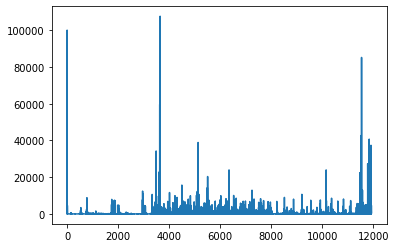

In [44]:
fec_df["Credit"].plot()

## Quelles sont les opérations de débit de plus de 70 000 € ? 

In [52]:
gros_debit = fec_df["Debit"] > 70000
fec_df[gros_debit]

,JournalCode,JournalLib,EcritureNum,EcritureDate,CompteNum,CompteLib,PieceRef,PieceDate,EcritureLib,Debit,Credit,ValidDate,Idevise
3637,AN,A-NOUVEAU,AN0000001,20190101,51230000,Lib_12,1,20190101,Ecriture_568,95818.24,0.0,20200403,EUR
3642,AN,A-NOUVEAU,AN0000001,20190101,58000000,Lib_2,1,20190101,Ecriture_569,107572.15,0.0,20200403,EUR
3648,AN,A-NOUVEAU,AN0000001,20190101,12900000,Lib_12,1,20190101,Ecriture_569,85152.11,0.0,20200403,EUR
11536,OD,OD,OD0000060,20190419,11900000,NaN,3381,20190419,NaN,71005.05,0.0,20200403,EUR


## Quelle est le nombre d'écritures par journaux ? 

In [54]:
journaux = fec_df.groupby('JournalCode')
journaux["EcritureNum"].count()

JournalCode
AN    3649
CI    4365
HA    3337
MB       9
OD     548
UT      16
Name: EcritureNum, dtype: int64